<a href="https://colab.research.google.com/github/Addy888/Addy888/blob/main/ml_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns

plt.style.use('seaborn-white') #Set the matplotlib stylesheet

<ipython-input-14-bea764f75e53>:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white') #Set the matplotlib stylesheet


In [ ]:
ccdef = pd.read_excel('/content/Default (1).xlsx')

/usr/local/lib/python3.9/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [ ]:
ccdef.head()

,Unnamed: 0,default,student,balance,income
0,1,No,No,729.526495,44361.625074
1,2,No,Yes,817.180407,12106.134700
2,3,No,No,1073.549164,31767.138947
3,4,No,No,529.250605,35704.493935
4,5,No,No,785.655883,38463.495879


In [ ]:
ccdef.shape

(10000, 5)

In [ ]:
 ccdef.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  10000 non-null  int64  
 1   default     10000 non-null  object 
 2   student     10000 non-null  object 
 3   balance     10000 non-null  float64
 4   income      10000 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 390.8+ KB


In [ ]:
ccdef.isnull().sum()

Unnamed: 0    0
default       0
student       0
balance       0
income        0
dtype: int64

In [ ]:
ccdef.describe()

,Unnamed: 0,balance,income
count,10000.00000,10000.000000,10000.000000
mean,5000.50000,835.374886,33516.981876
std,2886.89568,483.714985,13336.639563
min,1.00000,0.000000,771.967729
25%,2500.75000,481.731105,21340.462903
50%,5000.50000,823.636973,34552.644802
75%,7500.25000,1166.308386,43807.729272
max,10000.00000,2654.322576,73554.233495


In [ ]:
(ccdef.balance == 0).sum(axis=0)

499

In [ ]:
ccdef.student.value_counts()

No     7056
Yes    2944
Name: student, dtype: int64

In [ ]:
ccdef.default.value_counts()

No     9667
Yes     333
Name: default, dtype: int64

In [ ]:
import statsmodels.api as sm

In [ ]:
import statsmodels.discrete.discrete_model as sms

In [ ]:
X_train = ccdef.balance.values.reshape(-1,1)

In [ ]:
import sklearn.linear_model as skl_lm

In [ ]:
clf = skl_lm.LogisticRegression(solver='newton-cg')

In [ ]:
ccdef.describe()

,Unnamed: 0,balance,income
count,10000.00000,10000.000000,10000.000000
mean,5000.50000,835.374886,33516.981876
std,2886.89568,483.714985,13336.639563
min,1.00000,0.000000,771.967729
25%,2500.75000,481.731105,21340.462903
50%,5000.50000,823.636973,34552.644802
75%,7500.25000,1166.308386,43807.729272
max,10000.00000,2654.322576,73554.233495


In [ ]:
ccdef['default2'] = ccdef.default.factorize()[0]

In [ ]:
ccdef['student2'] = ccdef.student.factorize()[0]

In [ ]:
ccdef.head(3)

,Unnamed: 0,default,student,balance,income,default2,student2
0,1,No,No,729.526495,44361.625074,0,0
1,2,No,Yes,817.180407,12106.134700,0,1
2,3,No,No,1073.549164,31767.138947,0,0


In [ ]:
 ccdef_dfno = ccdef[ccdef.default2 == 0].sample(frac=0.15)

In [ ]:
ccdef_dfyes = ccdef[ccdef.default2 == 1]

In [ ]:
ccdef_df = ccdef_dfno.append(ccdef_dfyes)

<ipython-input-38-d672072487ab>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ccdef_df = ccdef_dfno.append(ccdef_dfyes)


TypeError: ignored

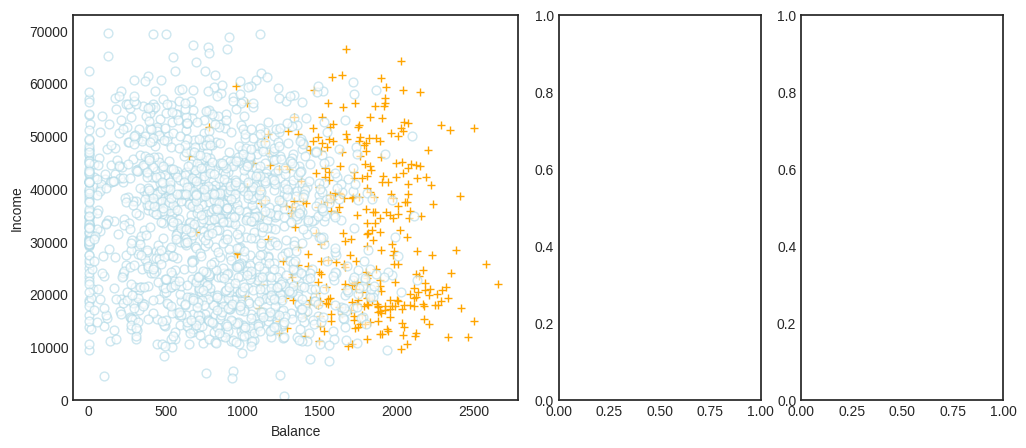

In [ ]:
fig = plt.figure(figsize=(12,5))
gs = mpl.gridspec.GridSpec(1, 4)
ax1 = plt.subplot(gs[0,:2])
ax2 = plt.subplot(gs[0,2:3])
ax3 = plt.subplot(gs[0,3:4])
ax1.scatter(ccdef_df[ccdef_df.default == 'Yes'].balance, ccdef_df[ccdef_df.default == 'Yes'].income, s=40, c='orange', marker='+', linewidths=1)
ax1.scatter(ccdef_df[ccdef_df.default == 'No'].balance, ccdef_df[ccdef_df.default == 'No'].income, s=40, marker='o', linewidths=1, edgecolors='lightblue', facecolors='white', alpha=.6)
ax1.set_ylim(ymin=0)
ax1.set_ylabel('Income')
ax1.set_xlim(xmin=-100)
ax1.set_xlabel('Balance')
c_palette = {'No':'lightblue', 'Yes':'orange'}
sns.boxplot('default', 'balance', data=ccdef, orient='v', ax=ax2, palette=c_palette)
sns.boxplot('default', 'income', data=ccdef, orient='v', ax=ax3, palette=c_palette)
gs.tight_layout(plt.gcf())

In [ ]:
X_train = ccdef.balance.values.reshape(-1,1)

In [ ]:
y = ccdef.default2

In [ ]:
X_test = np.arange(ccdef.balance.min(), ccdef.balance.max()).reshape(-1 ,1)

In [ ]:
import sklearn.linear_model as skl_lm

In [ ]:
clf = skl_lm.LogisticRegression(solver='newton-cg')

In [ ]:
clf.fit(X_train,y)

LogisticRegression(solver='newton-cg')

In [ ]:
prob = clf.predict_proba(X_test)

In [ ]:
 fig (ax1, ax2) = plt.subplots(1,2), figsize=(12,5))
sns.regplot(ccdef.balance, ccdef.default2, order=1, ci=None,scatter_kws={'color':'orange'},line_kws={'color':'lightblue', 'lw':2}, ax=ax1)
ax2.scatter(X_train, y, color='orange')
ax2.plot(X_test, prob[:,1], color='lightblue')
for ax in fig.axes:
ax.hlines(1, xmin=ax.xaxis.get_data_interval()[0],xmax=ax.xaxis.get_data_interval()[1], linestyles='dashed', lw=1)
ax.hlines(0, xmin=ax.xaxis.get_data_interval()[0],xmax=ax.xaxis.get_data_interval()[1], linestyles='dashed', lw=1)
ax.set_ylabel('Probability of default')
ax.set_xlabel('Balance')
ax.set_yticks([0, 0.25, 0.5, 0.75, 1.])
ax.set_xlim(xmin=-100)


SyntaxError: ignored

In [ ]:
print(clf)

LogisticRegression(solver='newton-cg')


In [ ]:
print('classes: ',clf.classes_)

classes:  [0 1]


In [ ]:
print('coefficients: ',clf.coef_)

coefficients:  [[0.00549892]]


In [ ]:
print('intercept :', clf.intercept_)

intercept : [-10.65132747]


In [ ]:
import statsmodels.api as sm

import statsmodels.discrete.discrete_model as sms

In [ ]:
X_train = sm.add_constant(ccdef.balance)

In [ ]:
est = sm.Logit(y.ravel(), X_train).fit()

Optimization terminated successfully.
         Current function value: 0.079823
         Iterations 10


In [ ]:
est.summary2().tables[1]

,Coef.,Std.Err.,z,P>|z|,[0.025,0.975]
const,-10.651331,0.361169,-29.491287,3.723665e-191,-11.359208,-9.943453
balance,0.005499,0.000220,24.952404,2.010855e-137,0.005067,0.005931


In [ ]:
X_train = sm.add_constant(ccdef.student2)

In [ ]:
y = ccdef.default2

In [ ]:
est = sms.Logit(y, X_train).fit()

Optimization terminated successfully.
         Current function value: 0.145434
         Iterations 7


In [ ]:
print(est.summary().tables[1].as_text())

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.5041      0.071    -49.554      0.000      -3.643      -3.366
student2       0.4049      0.115      3.520      0.000       0.179       0.630


In [ ]:
X_train = sm.add_constant(ccdef[['balance', 'income', 'student2']])

In [ ]:
est = sms.Logit(y, X_train).fit()

Optimization terminated successfully.
         Current function value: 0.078577
         Iterations 10


In [ ]:
print(est.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -10.8690      0.492    -22.079      0.000     -11.834      -9.904
balance        0.0057      0.000     24.737      0.000       0.005       0.006
income      3.033e-06    8.2e-06      0.370      0.712    -1.3e-05    1.91e-05
student2      -0.6468      0.236     -2.738      0.006      -1.110      -0.184


In [ ]:
X_train = ccdef[ccdef.student == 'Yes'].balance.values.reshape(-1,1)

y = ccdef[ccdef.student == 'Yes'].default2

In [ ]:
X_train2 = ccdef[ccdef.student == 'No'].balance.values.reshape(-1,1)

y2 = ccdef[ccdef.student == 'No'].default2

In [ ]:
X_test = np.arange(ccdef.balance.min(), ccdef.balance.max()).reshape(-1,1)

In [ ]:
clf = skl_lm.LogisticRegression(solver='newton-cg')

In [ ]:
clf.fit(X_train,y)

LogisticRegression(solver='newton-cg')